## Housing Price Prediction

The dataset we had to meet in lesson 2. In lesson 3, we will apply 3 machine learning model: Linear Regression, Decision Tree and Random Forest for housing price dataset 

### Step I. Read our dataset from csv file


In [1]:
import pandas as pd

In [2]:
housedf = pd.read_csv("./data/house_data.csv")

In [3]:
housedf.shape

(21613, 21)

In [4]:
housedf.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

#### Dataset contains:

Id: a notation for a house

Date: Date house was sold

Price: Price is prediction target

Bedrooms: Number of Bedrooms/House

Bathrooms: Number of bathrooms/House

Sqft_Living: square footage of the home

Sqft_Lot: square footage of the lot

Floors: Total floors (levels) in house

Waterfront: House which has a view to a waterfront

View: Has been viewed

Condition: How good the condition is ( Overall )

Grade: overall grade given to the housing unit, based on King County grading system

Sqft_Above: square footage of house apart from basement

Sqft_Basement: square footage of the basement

Yr_Built: Built Year

Yr_Renovated: Year when house was renovated

Zipcode: Zip

Lat: Latitude coordinate

Long: Longitude coordinate

Sqft_Living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

Sqft_Lot15: lotSize area in 2015(implies-- some renovations)



### Step II. Data Clearning

In [5]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Step III. Exploratory Data Analytics (EDA)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Let's now forward with data visualization using a pairplot

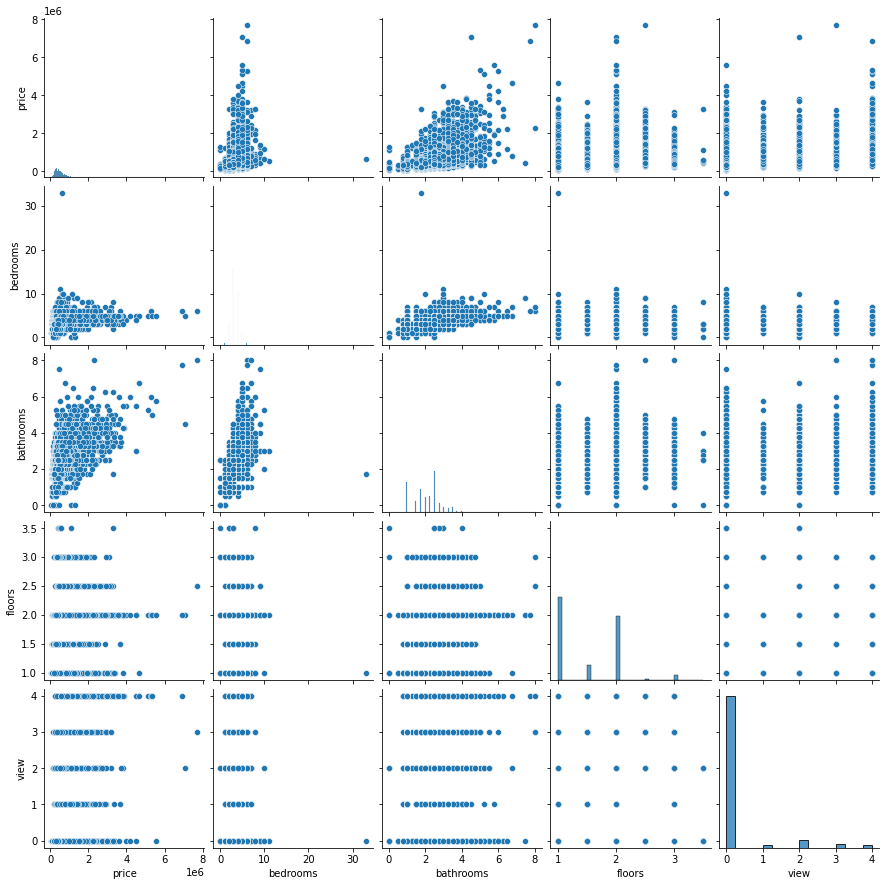

In [7]:
columns = ['price', 'bedrooms', 'bathrooms', 'floors', 'view']
sns.pairplot(housedf[columns])
plt.show()

#### Co relation between Variables

We wil use heatmap to view the co relation between variables

In [8]:
columns = ['price', 'bedrooms', 'bathrooms', 'floors', 'view']
sns.heatmap(housedf[columns].corr(),annot=True)

<AxesSubplot:>

### Step IV. Data Preparation

#### Dropping of the particular column value:

We don't require the column id and date at this point so we will be dropping them from the dataset.

In [9]:
housedf = housedf.drop(['id','date'],axis=1)

In [10]:
housedf.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

#### Splitting the Data into Training and Testing Sets

In [11]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

In [12]:
# X(Independent variables) and y(target variables) 
y = housedf['price']
X = housedf.drop(columns=['price'])

In [13]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Step V. Build and Train model

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

#### Multiple Linear Regression

Fitting the train set to multiple linear regression and getting the score of the model

In [15]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)

#### Decision Tree Regression

Fitting the train set to decision tree regression and getting the score of the model

In [16]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train,y_train)
decision_score=dtr.score(X_test,y_test)

#### Random Forest Regression

Fitting the train set to decision tree regression and getting the score of the model

In [17]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=42)
rf_regressor.fit(X_train,y_train)
rf_score=rf_regressor.score(X_test,y_test)

#### Calculate Model Score

Let's calculate the model score to understand how our model performed along with the explained variance score.

In [18]:
#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score]
                           })
models_score.sort_values(by='Score',ascending=False)

Model     Score
2    Random forest Regression  0.884785
1               Decision Tree  0.768206
0  Multiple Linear Regression  0.687790

#### Conclusion

From the above it is clear that random forest accuracy is 88% and also expalined variance score is 0.84 . So Random Forest is a suitable model for predicting the price of the house.

Though there remains other regression model which can bring out the best of the dataset.